In [1]:
def plot_settings(style='seaborn-whitegrid'):
    """
    Common rcParams for plot styling
    """
    import matplotlib as mpl
    
    mpl.style.use(style)
    mpl.rcParams['font.weight']= 'bold'
    mpl.rcParams['font.size']= 16

In [2]:
import pandas as pd
%matplotlib inline
from quilt.data.hsiaoyi0504 import aeolus_top5drugs
             
data = pd.read_feather(aeolus_top5drugs.aeolus_top5drugs._data())

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
def freqXbyY(data,x = 'drug_concept_id',y = 'report_year'):
    """
    helper groupby x and count y method
    """
    
    return data.groupby(x)[y].count()

In [4]:
grpd = freqXbyY(data,'drug_concept_id','id')

In [5]:
import ipywidgets as w

In [6]:
drugs = grpd.index.values
d = w.Dropdown(options = drugs)

In [7]:
d

Dropdown(options=(923645, 956874, 1112807, 1125315, 1501700), value=923645)

In [8]:
drug = d.label
ry_grpd = data.query('drug_concept_id==@drug').groupby('report_year')['report_year'].count()

In [9]:
plot_settings()

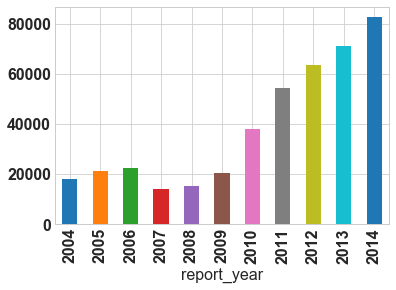

In [10]:
ry_grpd.plot(kind='bar')